In [1]:
import pandas as pd
df_diabetes=pd.read_csv("https://raw.githubusercontent.com/ind-kum/Datasets/master/Prima_Diabetes_Dataset.csv")
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
#lets check the null values in the dataset
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
#lets check the datatypes of the columns
df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

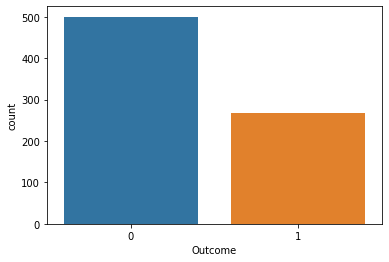

In [4]:
#lets chcek the count of target classes
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Outcome",data=df_diabetes)
plt.show()
#therefore dataset is imbalanced

In [5]:
#lets descibe the dataset
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#There are few attributes which can never be 0 like blood pressure,skin thickness and BMI
#Let's replace these 0's with mean
df_diabetes["BloodPressure"]=df_diabetes["BloodPressure"].replace(0,df_diabetes["BloodPressure"].mean())
df_diabetes["BMI"]=df_diabetes["BMI"].replace(0,df_diabetes["BMI"].mean())
df_diabetes["SkinThickness"]=df_diabetes["SkinThickness"].replace(0,df_diabetes["SkinThickness"].mean())

In [7]:
#Lets chcek other columns which contain 0
col_zero=list()
for col in df_diabetes.columns:
    if df_diabetes.loc[df_diabetes[col]==0].empty:
        continue
    else:
        col_zero.append(col)
print(col_zero)

['Pregnancies', 'Glucose', 'Insulin', 'Outcome']


In [8]:
#so from above we knw glucose and insulin can't be 0
#lets replace them by mean
df_diabetes["Glucose"]=df_diabetes["Glucose"].replace(0,df_diabetes["Glucose"].mean())
df_diabetes["Insulin"]=df_diabetes["Insulin"].replace(0,df_diabetes["Insulin"].mean())

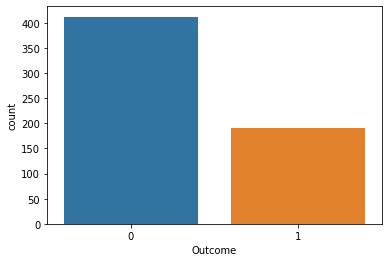

In [9]:
#Lets chcek the count of diabetic and non diabetic people having normal blood pressure
sns.countplot(x="Outcome",data=df_diabetes.loc[df_diabetes["BloodPressure"]<=80])
plt.show()

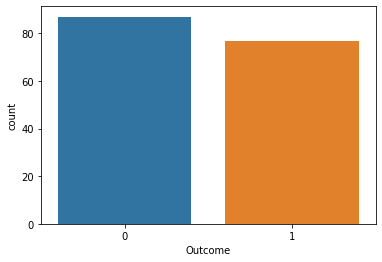

In [10]:
#Lets chcek the count of diabetic and non diabetic people having BP between 80 to 120 
sns.countplot(x="Outcome",data=df_diabetes.loc[(df_diabetes["BloodPressure"]>80)&(df_diabetes["BloodPressure"]<120)])
plt.show()

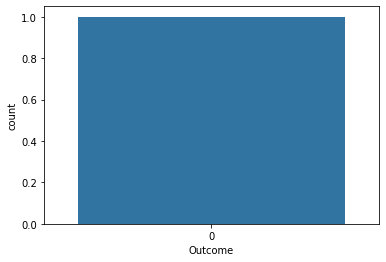

In [11]:
#count of diabetic people for BP 120 or higher
sns.countplot(x="Outcome",data=df_diabetes.loc[df_diabetes["BloodPressure"]>=120])
plt.show()

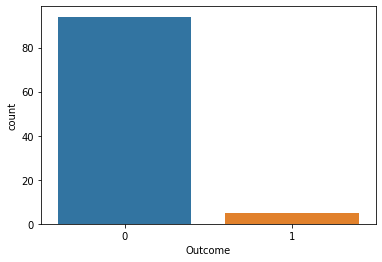

In [12]:
#normal glucose level and count of diabetic and non diabetic people
sns.countplot(x="Outcome",data=df_diabetes.loc[(df_diabetes["Glucose"]<90)])
plt.show()
#Herre diabetic persons are very less

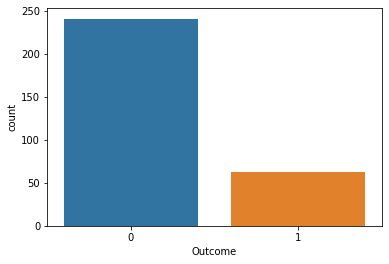

In [13]:
# Glucose level between 90 to 120
sns.countplot(x="Outcome",data=df_diabetes.loc[(df_diabetes["Glucose"]>=90)&(df_diabetes["Glucose"]<120)])
plt.show()

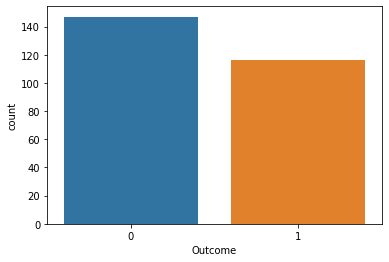

In [14]:
# medium glucose level 120 to 160
sns.countplot(x="Outcome",data=df_diabetes.loc[(df_diabetes["Glucose"]>=120)&(df_diabetes["Glucose"]<160)])
plt.show()
#we are seeing as glucose level is risng count of people having diabetes is also increasing

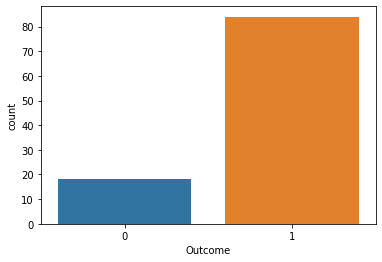

In [15]:
# Too high glucose level
sns.countplot(x="Outcome",data=df_diabetes.loc[(df_diabetes["Glucose"]>=160)&(df_diabetes["Glucose"]<240)])
plt.show()
#Here people having diabetes are far more than those who dont have

In [40]:
Lets chcek the skewness in the dataset
df_diabetes.skew()

SyntaxError: invalid syntax (<ipython-input-40-639d8e907582>, line 1)

In [18]:
#we need to treat the skewness
import numpy as np
for index in df_diabetes.drop(columns=["Outcome"]).skew().index:
    if df_diabetes.drop(columns=["Outcome"]).skew().loc[index] > 0.55:
        df_diabetes[index]=np.log1p(df_diabetes[index])

In [19]:
#lets chcek the skewness again
df_diabetes.skew()
#we see skewness has been reduced for each column

Pregnancies                -0.243478
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness               0.013768
Insulin                     0.879642
BMI                        -0.035776
DiabetesPedigreeFunction    1.117942
Age                         0.614664
Outcome                     0.635017
dtype: float64

In [20]:
#Lets seprate input and output variable
df_x=df_diabetes.drop(columns=["Outcome"])
y=df_diabetes[["Outcome"]]

In [21]:
#from imblearn.over_sampling import SMOTE
#df_x, y = SMOTE().fit_sample(df_x, y)

In [22]:
#Lets scale down the features to common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)

In [23]:
#Lets do standard scaling of the input variable
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [24]:
#lets use decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
maxf1_score(dc,df_x,y)

maximum f1_score is at random state : 92  and it is : 0.7079646017699114


In [25]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="f1").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="f1"))

Mean f1 score for decision tree classifier:  0.5762162527673306
standard deviation in f1 score for decision tree classifier:  0.047793767904091324
[0.53333333 0.61157025 0.5        0.63157895 0.61386139]


In [26]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 21}

In [27]:
kc=KNeighborsClassifier(n_neighbors=21)
maxf1_score(kc,x,y)

maximum f1_score is at random state : 66  and it is : 0.7735849056603773


In [28]:
print("Mean f1 score for KNN  classifier: ",cross_val_score(kc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for KNN classifier: ",cross_val_score(kc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(kc,x,y,cv=5,scoring="f1"))

Mean f1 score for KNN  classifier:  0.6438873398329583
standard deviation in f1 score for KNN classifier:  0.03650048480102086
[0.63157895 0.60784314 0.63529412 0.71428571 0.63043478]


In [29]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [30]:
svc=SVC(kernel="linear",C=10)
maxf1_score(svc,x,y)

maximum f1_score is at random state : 61  and it is : 0.7450980392156864


In [31]:
print("Mean f1 score for SVM  classifier: ",cross_val_score(svc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(svc,x,y,cv=5,scoring="f1"))

Mean f1 score for SVM  classifier:  0.627159420743259
standard deviation in f1 score for SVM classifier:  0.02048526806780368
[0.625      0.62135922 0.61052632 0.66666667 0.6122449 ]


In [32]:
#Lets use random forest classifier
from sklearn.ensemble import RandomForestClassifier
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5)
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

In [33]:
rf_clf=RandomForestClassifier(n_estimators=500)
maxf1_score(rf_clf,df_x,y)

maximum f1_score is at random state : 97  and it is : 0.7378640776699029


In [34]:
print("Mean f1 score for random forest  classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="f1").std())
print(cross_val_score(rf_clf,df_x,y,cv=5,scoring="f1"))

Mean f1 score for random forest  classifier:  0.642280781962614
standard deviation in f1 score for random forest classifier:  0.06366269645623972
[0.6728972  0.63551402 0.59340659 0.77227723 0.6185567 ]


In [35]:
#Lets use Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5)
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [36]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000)
maxf1_score(gb_clf,df_x,y)

maximum f1_score is at random state : 73  and it is : 0.74


In [37]:
print("Mean auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="f1").mean())
print("standard deviation in auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="f1").std())
print(cross_val_score(gb_clf,df_x,y,cv=5,scoring="f1"))

Mean auc roc score for gradient boosting classifier:  0.6450966848131385
standard deviation in auc roc score for gradient boosting classifier:  0.025149081529037175
[0.67961165 0.63063063 0.65346535 0.65979381 0.62      ]


In [38]:
#lets make the model with KNN
#since from above we know maximum auc f1 score we got for random state 66 so we will use it
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 66,test_size=0.20,stratify=y)
kc=KNeighborsClassifier(n_neighbors=21)
kc.fit(x_train,y_train)
y_pred=kc.predict(x_test)

In [39]:
#Lets print auc roc score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
#so the best what we can get we got here and using above cross validation we verified that its not result of overfitting

Confusion matrix 
 [[89 11]
 [13 41]]
f1 score is :  0.7735849056603773
classification report 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       100
           1       0.79      0.76      0.77        54

    accuracy                           0.84       154
   macro avg       0.83      0.82      0.83       154
weighted avg       0.84      0.84      0.84       154

